<a href="https://colab.research.google.com/github/Witcape/3D_Printing/blob/main/Final_Results/ALL_PARAMS_DEIT_SRCNN_FINAL_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
!pip install torch
!pip install torchvision
import torch

In [4]:
from datasets import load_dataset
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, RandomResizedCrop, RandomHorizontalFlip, Normalize, ToTensor
from transformers import AutoFeatureExtractor, ViTForImageClassification
import tqdm

In [5]:
# Load pre-trained DeiT model
model = ViTForImageClassification.from_pretrained('facebook/deit-base-patch16-224')

num_classes = 3
model.classifier = torch.nn.Linear(model.classifier.in_features, num_classes)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [6]:
# Feature extractor for DeiT
feature_extractor = AutoFeatureExtractor.from_pretrained('facebook/deit-base-patch16-224')

# Define image transformations
transform = Compose([
    RandomResizedCrop(224),
    RandomHorizontalFlip(),
    ToTensor(),
    Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std),
])

# Load dataset using ImageFolder
from torchvision.datasets import ImageFolder
train_dataset = ImageFolder("/content/drive/MyDrive/Final_Final/Train", transform=transform)
val_dataset = ImageFolder("/content/drive/MyDrive/Final_Final/Test", transform=transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [7]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.nn import CrossEntropyLoss

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=10)

# Loss function
criterion = CrossEntropyLoss()

In [8]:
# train_losses = []
# val_losses = []
# train_accuracies = []
# val_accuracies = []

# from tqdm import tqdm

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Header for epoch tracking
# print(f"{'Epoch':<8}{'Train Loss':<15}{'Val Loss':<15}{'Val Accuracy':<15}")
# print("-" * 50)

# for epoch in range(1, 11):  # Number of epochs
#     # Training loop
#     model.train()
#     train_loss = 0
#     for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch}", leave=False):
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images).logits
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()

#     train_losses.append(train_loss)
#     train_accuracies.append(train_accuracy)

#     train_loss /= len(train_loader)

#     # Validation loop
#     model.eval()
#     val_loss, correct = 0, 0
#     with torch.no_grad():
#         for images, labels in tqdm(val_loader, desc=f"Validation Epoch {epoch}", leave=False):
#             images, labels = images.to(device), labels.to(device)

#             outputs = model(images).logits
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()
#             correct += (outputs.argmax(dim=1) == labels).sum().item()


#     val_loss /= len(val_loader)
#     val_accuracy = correct / len(val_dataset)
#     val_losses.append(val_loss)
#     val_accuracies.append(val_accuracy)

#     # Log epoch results in a tabular format
#     tqdm.write(f"{epoch:<8}{train_loss:<15.4f}{val_loss:<15.4f}{val_accuracy:<15.4f}")

#     scheduler.step()


In [9]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Header for epoch tracking
print(f"{'Epoch':<8}{'Train Loss':<15}{'Val Loss':<15}{'Train Acc':<15}{'Val Accuracy':<15}")
print("-" * 60)

for epoch in range(1, 11):  # Number of epochs
    # Training loop
    model.train()
    train_loss = 0
    correct = 0
    total_train_samples = 0
    for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch}", leave=False):
        images, labels = images.to(device), labels.to(device)
        total_train_samples += labels.size(0)

        optimizer.zero_grad()
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        correct += (outputs.argmax(dim=1) == labels).sum().item()

    train_loss /= len(train_loader)  # Average train loss
    train_accuracy = correct / total_train_samples  # Train accuracy

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    val_loss, correct = 0, 0
    total_val_samples = 0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc=f"Validation Epoch {epoch}", leave=False):
            images, labels = images.to(device), labels.to(device)
            total_val_samples += labels.size(0)

            outputs = model(images).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()

    val_loss /= len(val_loader)  # Average validation loss
    val_accuracy = correct / total_val_samples  # Validation accuracy

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Log epoch results in a tabular format
    tqdm.write(f"{epoch:<8}{train_loss:<15.4f}{val_loss:<15.4f}{train_accuracy:<15.4f}{val_accuracy:<15.4f}")

    scheduler.step()


Epoch   Train Loss     Val Loss       Train Acc      Val Accuracy   
------------------------------------------------------------


1       0.6238         0.3041         0.7275         0.8892         


2       0.2024         0.2731         0.9296         0.8917         


3       0.1367         0.2385         0.9573         0.9068         


4       0.0930         0.3161         0.9746         0.8992         


5       0.0640         0.2400         0.9804         0.9244         


6       0.0649         0.2405         0.9804         0.9219         


7       0.0489         0.2130         0.9873         0.9395         


8       0.0462         0.2241         0.9873         0.9219         


9       0.0425         0.2217         0.9815         0.9144         


10      0.0372         0.2436         0.9885         0.9144         


In [10]:
all_labels = []
all_preds = []

In [11]:
model.eval()
val_loss, correct = 0, 0
with torch.no_grad():
    for images, labels in tqdm(val_loader, desc=f"Validation Epoch {epoch}", leave=False):
        images, labels = images.to(device), labels.to(device)

        # Model predictions
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        # Collect predictions and true labels
        all_labels.extend(labels.cpu().numpy())  # Convert to CPU and NumPy array
        all_preds.extend(outputs.argmax(dim=1).cpu().numpy())  # Predicted labels

        # Accuracy calculation
        correct += (outputs.argmax(dim=1) == labels).sum().item()

# Final loss and accuracy
val_loss /= len(val_loader)
final_accuracy = correct / len(val_dataset)

print("\nTraining Complete!")
print(f"Final Validation Loss: {val_loss:.4f}")
print(f"Final Validation Accuracy: {final_accuracy:.4f}")


Training Complete!
Final Validation Loss: 0.2436
Final Validation Accuracy: 0.9244


In [12]:
import torch
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score,
                             matthews_corrcoef, cohen_kappa_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'all_labels' and 'all_preds' are collected from your validation loop

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
num_classes = conf_matrix.shape[0]

# Initialize variables for overall metrics
total_TP, total_FN, total_TN, total_FP = 0, 0, 0, 0

# Extract TN, FP, FN, TP and calculate per-class metrics
per_class_metrics = []
for i in range(num_classes):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)

    # Accumulate overall values
    total_TP += TP
    total_FN += FN
    total_FP += FP
    total_TN += TN

    # Append per-class metrics
    per_class_metrics.append({
        'class': f'Class {i}',
        'accuracy': (TP + TN) / (TP + TN + FP + FN),
        'sensitivity': TP / (TP + FN) if (TP + FN) > 0 else 0,  # Avoid division by zero
        'specificity': TN / (TN + FP) if (TN + FP) > 0 else 0,  # Avoid division by zero
    })


In [13]:
accuracy = np.trace(conf_matrix) / conf_matrix.sum()
sensitivity = total_TP / (total_TP + total_FN)
specificity = total_TN / (total_TN + total_FP)

# Calculate other metrics
precision = precision_score(all_labels, all_preds, average="weighted")
f1 = f1_score(all_labels, all_preds, average="weighted")
mcc = matthews_corrcoef(all_labels, all_preds)
kappa = cohen_kappa_score(all_labels, all_preds)

# Print final overall values
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print(f"Overall Sensitivity (Recall): {sensitivity * 100:.2f}%")
print(f"Overall Specificity: {specificity * 100:.2f}%")
print(f"F1 Score (Weighted): {f1 * 100:.2f}%")
print(f"Precision (Weighted): {precision * 100:.2f}%")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

# To Copy easily:
print(f"{accuracy * 100:.2f}%")
print(f"{sensitivity * 100:.2f}%")
print(f"{specificity * 100:.2f}%")
print(f"{f1 * 100:.2f}%")
print(f"{precision * 100:.2f}%")
print(f"{mcc:.4f}")
print(f"{kappa:.4f}")


Overall Metrics:
Overall Accuracy: 92.44%
Overall Sensitivity (Recall): 92.44%
Overall Specificity: 96.22%
F1 Score (Weighted): 92.42%
Precision (Weighted): 92.50%
Matthews Correlation Coefficient: 0.8853
Cohen's Kappa: 0.8848
92.44%
92.44%
96.22%
92.42%
92.50%
0.8853
0.8848


Accuracy: 0.9244
Sensitivity (Recall): 0.9244
Specificity: 0.9622
F1 Score (Weighted): 0.9242
Precision (Weighted): 0.9250
MCC: 0.8853
Kappa: 0.8848


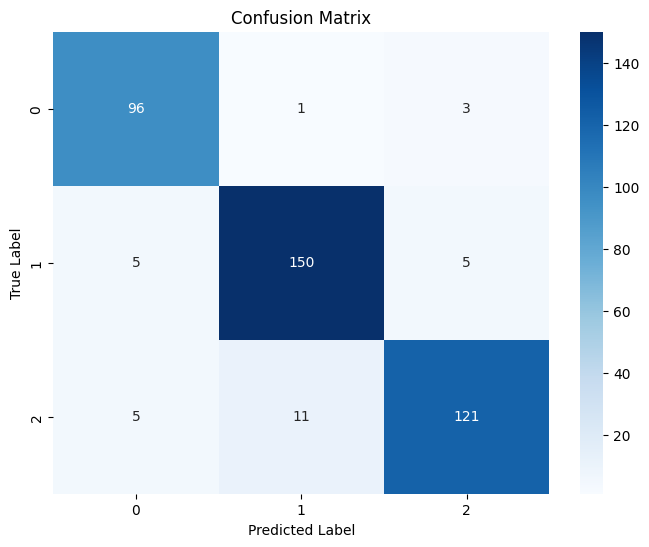

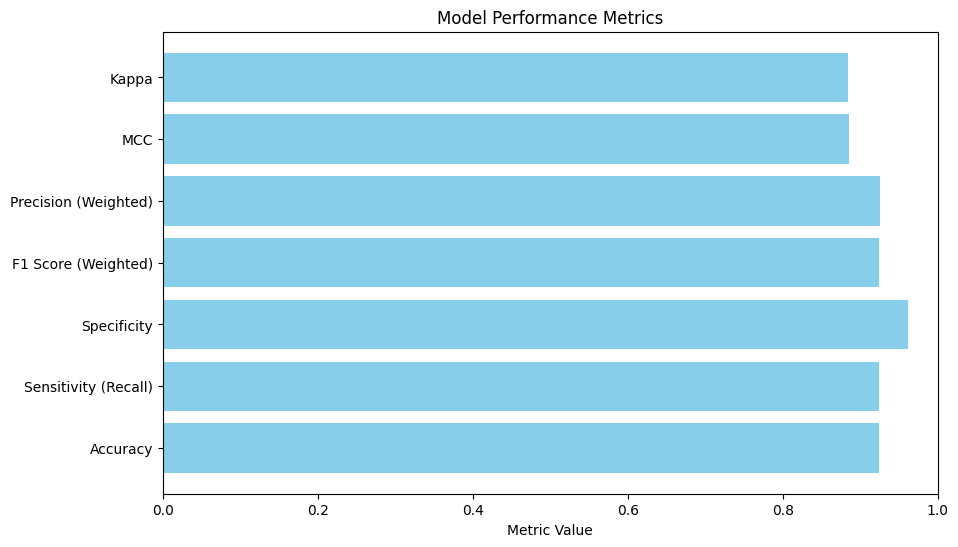

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Metrics summary (reuse variables from earlier calculations)
metrics = {
    "Accuracy": accuracy,
    "Sensitivity (Recall)": np.mean(sensitivity),
    "Specificity": np.mean(specificity),
    "F1 Score (Weighted)": f1,
    "Precision (Weighted)": precision,
    "MCC": mcc,
    "Kappa": kappa,
}

# Print all metrics for reference
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot metrics as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(list(metrics.keys()), list(metrics.values()), color="skyblue")
plt.xlabel("Metric Value")
plt.title("Model Performance Metrics")
plt.xlim(0, 1)  # Metrics are between 0 and 1
plt.show()


In [15]:



# # Calculate training accuracy
# train_correct = 0
# for images, labels in train_loader:
#     images, labels = images.to(device), labels.to(device)
#     outputs = model(images).logits
#     train_correct += (outputs.argmax(dim=1) == labels).sum().item()
# train_accuracy = train_correct / len(train_dataset)

# # Append results for plotting
# train_losses.append(train_loss)
# val_losses.append(val_loss)
# train_accuracies.append(train_accuracy)
# val_accuracies.append(val_accuracy)


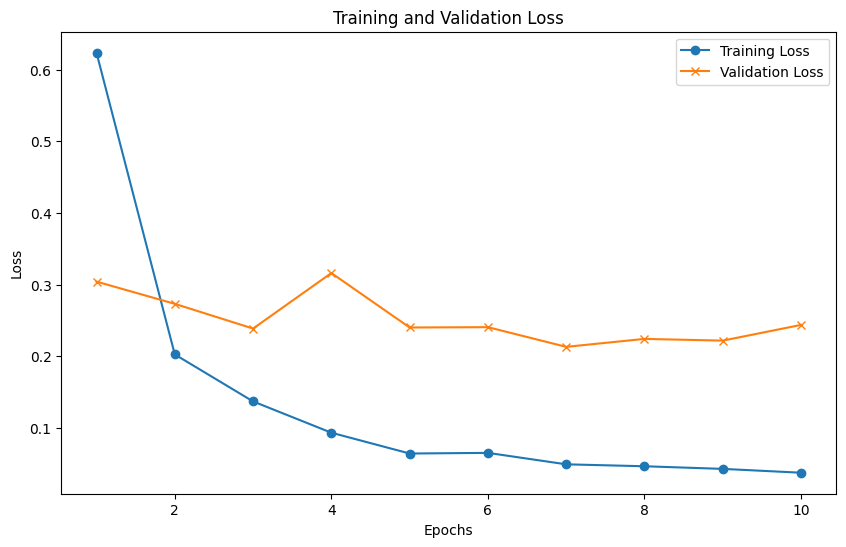

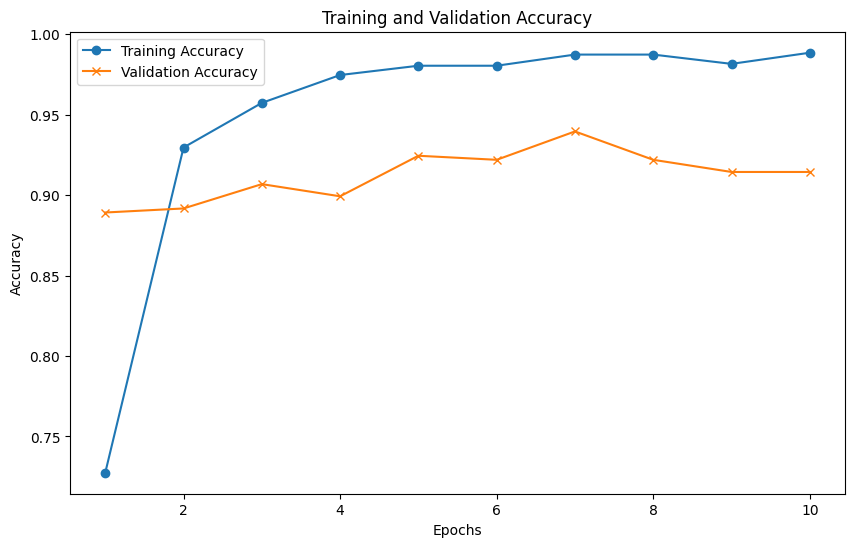

In [16]:
epochs = range(1, len(train_losses) + 1)

# Plot Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="x")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


# Plot Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(epochs, val_accuracies, label="Validation Accuracy", marker="x")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()


In [17]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# # Plot Metrics
# metrics = [accuracy, sensitivity, specificity, precision, f1, mcc, kappa]
# metric_names = ["Accuracy", "Sensitivity", "Specificity", "Precision", "F1 Score", "MCC", "Kappa"]

# plt.figure(figsize=(10, 6))
# plt.barh(metric_names, metrics, color="skyblue")
# plt.xlabel("Metric Value")
# plt.title("Model Metrics")
# plt.xlim(0, 1)  # Metrics are between 0 and 1
# plt.show()

# # Assuming 'pretrained_vit_results' holds your loss and accuracy data for training and testing
# epochs = range(1, len(pretrained_vit_results['train_loss']) + 1)

# # Test Loss Curve
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, pretrained_vit_results['test_loss'], label='Test Loss', marker='o')
# plt.plot(epochs, pretrained_vit_results['train_loss'], label='Training Loss', marker='x')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Test and Training Loss Curve')
# plt.legend()
# plt.show()

# print("Test Loss:", pretrained_vit_results['test_loss'][-1])
# print("Training Loss:", pretrained_vit_results['train_loss'][-1])

# # Test Accuracy Curve
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, pretrained_vit_results['test_acc'], label='Test Accuracy', marker='o')
# plt.plot(epochs, pretrained_vit_results['train_acc'], label='Training Accuracy', marker='x')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Test and Training Accuracy Curve')
# plt.legend()
# plt.show()

# print("Test Accuracy:", pretrained_vit_results['test_acc'][-1])
# print("Training Accuracy:", pretrained_vit_results['train_acc'][-1])